In [1]:
from disentangle.data_loader.raw_mrc_dloader import get_mrc_data
import os

In [2]:
ch1path = '/group/jug/ashesh/data/BioSR/F-actin/GT_all_a.mrc'
ch2path = '/group/jug/ashesh/data/BioSR/CCPs/GT_all.mrc'
ch3path ='/group/jug/ashesh/data/BioSR/ER/GT_all.mrc'
ch4path = '/group/jug/ashesh/data/BioSR/F-actin_Nonlinear/GT_all_a.mrc'
ch5path = '/group/jug/ashesh/data/BioSR/Microtubules/GT_all.mrc'

In [3]:
data1 = get_mrc_data(ch1path)
data2 = get_mrc_data(ch2path)
data3 = get_mrc_data(ch3path)
data4 = get_mrc_data(ch4path)
data5 = get_mrc_data(ch5path)

Text(0.5, 1.0, 'Microtubules')

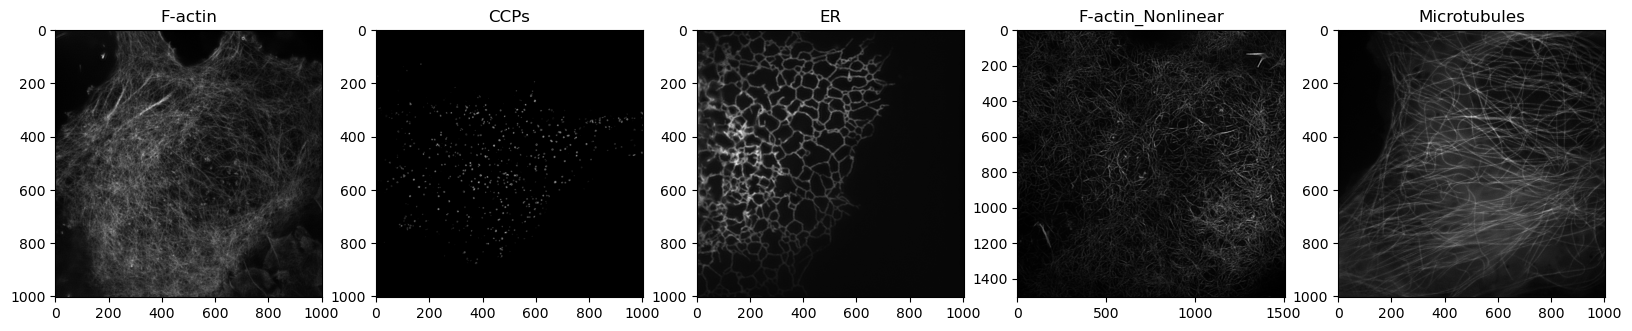

In [4]:
import matplotlib.pyplot as plt

_,ax = plt.subplots(figsize=(20,4),ncols=5)
ax[0].imshow(data1[0],cmap='gray')
ax[1].imshow(data2[0],cmap='gray')
ax[2].imshow(data3[0],cmap='gray')
ax[3].imshow(data4[0],cmap='gray')
ax[4].imshow(data5[0],cmap='gray')

ax[0].set_title(os.path.basename(os.path.dirname(ch1path)))
ax[1].set_title(os.path.basename(os.path.dirname(ch2path)))
ax[2].set_title(os.path.basename(os.path.dirname(ch3path)))
ax[3].set_title(os.path.basename(os.path.dirname(ch4path)))
ax[4].set_title(os.path.basename(os.path.dirname(ch5path)))


/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ashesh.ashesh/mambaforge/envs/usplit/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

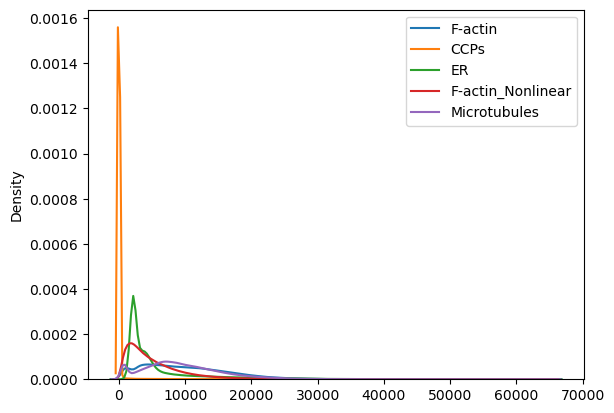

In [7]:
import seaborn as sns
sns.kdeplot(data1[0].flatten(),label=os.path.basename(os.path.dirname(ch1path)))
sns.kdeplot(data2[0].flatten(),label=os.path.basename(os.path.dirname(ch2path)))
sns.kdeplot(data3[0].flatten(),label=os.path.basename(os.path.dirname(ch3path)))
sns.kdeplot(data4[0].flatten(),label=os.path.basename(os.path.dirname(ch4path)))
sns.kdeplot(data5[0].flatten(),label=os.path.basename(os.path.dirname(ch5path)))
plt.legend()


In [29]:
import numpy as np
for idx, data in enumerate([data1, data2, data3, data4, data5]):
    qs = np.quantile(data.flatten(),[0, 0.01,0.5, 0.995, 1]).astype(np.int32)
    label = os.path.basename(os.path.dirname(globals()[f'ch{idx+1}path']))
    print(label.rjust(20),'\t\t', qs, data.shape)

             F-actin 		 [    0   148  5133 30308 65535] (51, 1004, 1004)
                CCPs 		 [    0     0     0 17766 65535] (54, 1004, 1004)
                  ER 		 [    0  1022  3909 35529 65535] (68, 1004, 1004)
   F-actin_Nonlinear 		 [    0    92  2801 22820 65535] (51, 1506, 1506)
        Microtubules 		 [    0    55  3995 31151 65535] (55, 1004, 1004)


## Two versions of F-actin data.
It is not clear why they have provided these two versions. Also, we have another 2 versions with Actin non-linear. 

In [ ]:
data12 = get_mrc_data('/group/jug/ashesh/data/BioSR/F-actin/GT_all_b.mrc')
np.quantile(data12.flatten(),[0, 0.01,0.5, 0.995, 1]).astype(np.int32)

Text(0.5, 1.0, 'GT_all_b.mrc')

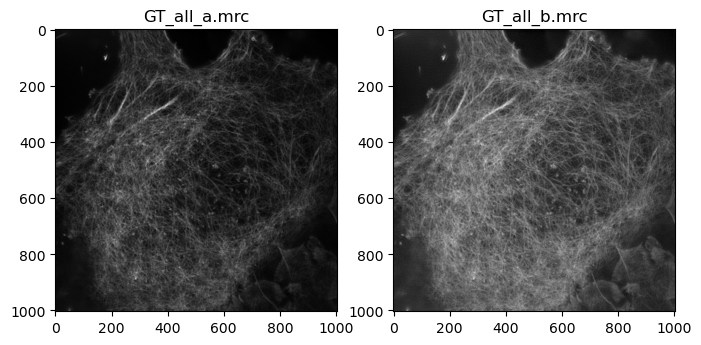

In [33]:
_,ax = plt.subplots(figsize=(8,4),ncols=2)
ax[0].imshow(data1[0],cmap='gray')
ax[1].imshow(data12[0],cmap='gray')
ax[0].set_title(os.path.basename(ch1path))
ax[1].set_title(os.path.basename(('/group/jug/ashesh/data/BioSR/F-actin/GT_all_b.mrc')))

## Intensity profile across slices

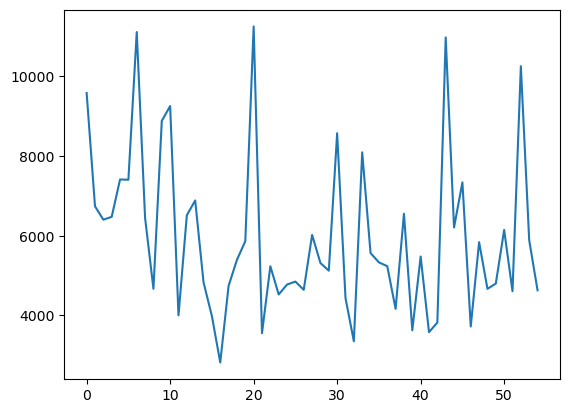

In [39]:
plt.plot(np.mean(data5.reshape(len(data5),-1),axis=1), label = os.path.basename(os.path.dirname(ch1path)))
